In [2]:
import pandas as pd

In [3]:
crime_data=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\files\women_crime\NDAP_REPORT_7060.csv')
crime_data

,Rowid,Country,State lgd code,State,Year,Crime head ipc ( indian penal code ) category,Crime head ipc ( indian penal code ) sub-category,Incidence of ipc ( indian penal code ) crimes,Victims of ipc ( indian penal code ) crimes,Ipc ( indian penal code ) crime rate
0,1,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,"Arson (Sec.435, 436 & 438 IPC)",187.800796,194.647700,1.400000
1,2,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Cheating by Impersonation (Sec.419 IPC),0.000000,0.000000,0.000000
2,3,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Circulate False/Fake News/Rumours (Sec.505 IPC...,12.715679,12.715679,0.100000
3,4,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Intimidation (Sec.506 r/w Other IPC C...,42.059553,46.950199,0.300000
4,5,India,1,Jammu And Kashmir,2018,Miscellaneous IPC Crimes,Criminal Trespass (Sec.447 to 452 IPC),1106.264063,1146.367358,8.400000
...,...,...,...,...,...,...,...,...,...,...
5107,5108,India,38,The Dadra And Nagar Haveli And Daman And Diu,2018,Offences Relating to Documents & Property Marks,"Forgery, Cheating & Fraud |Fraud |d) Other Frauds",2.000000,2.000000,0.207211
5108,5109,India,38,The Dadra And Nagar Haveli And Daman And Diu,2018,Offences Relating to Documents & Property Marks,"Forgery, Cheating & Fraud |Fraud |Fraud (Sec....",4.000000,4.000000,0.414421
5109,5110,India,38,The Dadra And Nagar Haveli And Daman And Diu,2018,Offences Relating to Documents & Property Marks,Offences Relating to Documents & Property Mark...,41.000000,41.000000,4.394611
5110,5111,India,38,The Dadra And Nagar Haveli And Daman And Diu,2018,Other IPC Crimes,Other IPC Crimes,42.000000,43.000000,4.518937


In [4]:
meta_data=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\files\women_crime\7060_metadata.csv')
meta_data

,VariableName,VariableCode,Type_Of_Variable,Unit_Of_Measure,Scaling_Factor,Aggregation_Type,Weighing_Varible_ID,Weighing_Variable_Name,Long_Description
0,Country,Country,Key Identifier,NaN,0,NaN,NaN,NaN,Country
1,State lgd code,StateCode,Key Identifier,NaN,0,NaN,NaN,NaN,State LGD Code
2,State,StateName,Key Identifier,NaN,0,NaN,NaN,NaN,State
3,Year,Year,Key Identifier,NaN,0,NaN,NaN,NaN,Year
4,Crime head ipc ( indian penal code ) category,D7060_3,Key Identifier,NaN,0,NaN,NaN,NaN,Crime head Category under IPC crimes
5,Crime head ipc ( indian penal code ) sub-category,D7060_4,Key Identifier,NaN,0,NaN,NaN,NaN,Crime head Sub-category under IPC crimes
6,Incidence of ipc ( indian penal code ) crimes,I7060_5,Numeric Variable,Number,1,sum,WeighingRatio_TotalPopulation,Total Population from Census,Incidence of crimes reported under Indian Pena...
7,Victims of ipc ( indian penal code ) crimes,I7060_6,Numeric Variable,Number,1,sum,WeighingRatio_TotalPopulation,Total Population from Census,Victims of crimes
8,Ipc ( indian penal code ) crime rate,I7060_7,Numeric Variable,Ratio,1,weighted avg,WeighingRatio_Percentage_TotalPopulation,Total Population from Census,Rate of crime is the number of crime reported ...


In [15]:
women_keywords=['rape','dowry','assault','woman','girl','molestation','eve teasing','kidnapping']
crime_data['Crime_head_lower']=crime_data['Crime head ipc ( indian penal code ) sub-category'].str.lower()
women_crimes=crime_data[crime_data['Crime_head_lower'].str.contains('|'.join(women_keywords),na=False)]

women_statewise=women_crimes.groupby('State')[['Incidence of ipc ( indian penal code ) crimes',
                                               'Victims of ipc ( indian penal code ) crimes']].sum().reset_index()
women_statewise.columns=['State','Total_Cases','Total_Victims']


keys = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\files\women_crime\7060_KEYS.csv")
#keys.head()
#keys.info()



female_by_state=keys[['StateName','TotalPopulationFemale']].copy()
female_by_state = female_by_state.groupby('StateName')['TotalPopulationFemale'].sum().reset_index()
female_by_state.columns = ['State', 'Female_Population']



merged_data=pd.merge(women_statewise,female_by_state,on='State',how='inner')

merged_data['Cases_per_1000_Females']=merged_data['Total_Cases']/merged_data['Female_Population']*1000
merged_data['Victims_per_1000_Females']=merged_data['Total_Victims']/merged_data['Female_Population']*1000

merged_data.to_csv("cleaned.csv",index=False)

merged_data.head()

,State,Total_Cases,Total_Victims,Female_Population,Cases_per_1000_Females,Victims_per_1000_Females


In [17]:
print("States in women_statewise")
print(women_statewise['State'].unique())

States in women_statewise
['Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [18]:
print("states in female_by_state")
print(female_by_state['State'].unique())

states in female_by_state
['ANDAMAN AND NICOBAR ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'CHANDIGARH' 'CHHATTISGARH' 'DELHI' 'GOA' 'GUJARAT'
 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND' 'KARNATAKA'
 'KERALA' 'LADAKH' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR'
 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TELANGANA'
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU' 'TRIPURA' 'UTTAR PRADESH'
 'UTTARAKHAND' 'WEST BENGAL']


In [20]:
women_statewise['State']=women_statewise['State'].str.strip().str.lower()
print(women_statewise['State'].unique())

['andaman and nicobar islands' 'andhra pradesh' 'arunachal pradesh'
 'assam' 'bihar' 'chandigarh' 'chhattisgarh' 'delhi' 'goa' 'gujarat'
 'haryana' 'himachal pradesh' 'jammu and kashmir' 'jharkhand' 'karnataka'
 'kerala' 'ladakh' 'lakshadweep' 'madhya pradesh' 'maharashtra' 'manipur'
 'meghalaya' 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab'
 'rajasthan' 'sikkim' 'tamil nadu' 'telangana'
 'the dadra and nagar haveli and daman and diu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal']


In [22]:
female_by_state['State']=female_by_state['State'].str.strip().str.lower()
print(female_by_state['State'].unique())

['andaman and nicobar islands' 'andhra pradesh' 'arunachal pradesh'
 'assam' 'bihar' 'chandigarh' 'chhattisgarh' 'delhi' 'goa' 'gujarat'
 'haryana' 'himachal pradesh' 'jammu and kashmir' 'jharkhand' 'karnataka'
 'kerala' 'ladakh' 'lakshadweep' 'madhya pradesh' 'maharashtra' 'manipur'
 'meghalaya' 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab'
 'rajasthan' 'sikkim' 'tamil nadu' 'telangana'
 'the dadra and nagar haveli and daman and diu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal']


In [23]:
merged_data=pd.merge(women_statewise,female_by_state,on='State',how='inner')
print("Rows after merge:",len(merged_data))

Rows after merge: 36


In [25]:
merged_data['Cases_per_1000_Females']=merged_data['Total_Cases']/merged_data['Female_Population']*1000
merged_data['Victims_per_1000_Females']=merged_data['Total_Victims']/merged_data['Female_Population']*1000

merged_data.to_csv("final_cleaned.csv",index=False)

merged_data.head()

,State,Total_Cases,Total_Victims,Female_Population,Cases_per_1000_Females,Victims_per_1000_Females
0,andaman and nicobar islands,219.0,225.0,177710,1.232345,1.266108
1,andhra pradesh,13942.0,14372.0,24746590,0.563391,0.580767
2,arunachal pradesh,647.0,692.0,669815,0.965938,1.033121
3,assam,32049.0,33678.0,15266133,2.099353,2.206060
4,bihar,24340.0,24463.0,49821295,0.488546,0.491015


In [26]:
missing=set(women_statewise['State'])-set(female_by_state['State'])
print("Missing states in population data",missing)

Missing states in population data set()


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()

In [29]:
merged_data[['Cases_per_1000_Females_Norm','Victims_per_1000_Females_Norm']]=scaler.fit_transform(
    merged_data[['Cases_per_1000_Females','Victims_per_1000_Females']])
merged_data['Women_Safety_Score']=1-(merged_data['Cases_per_1000_Females_Norm']+merged_data['Victims_per_1000_Females_Norm'])/2
    

In [31]:
print("Top 10 safest states for women")
print(merged_data.sort_values('Women_Safety_Score',ascending=False)[['State','Women_Safety_Score']].head(10))
print("Top 10 riskiest states from women")

print()
print()

print(merged_data.sort_values('Women_Safety_Score',ascending=True)[['State','Women_Safety_Score']].head(10))

Top 10 safest states for women
          State  Women_Safety_Score
17  lakshadweep            1.000000
29   tamil nadu            0.980191
9       gujarat            0.928807
23     nagaland            0.923718
20      manipur            0.912344
25   puducherry            0.906748
22      mizoram            0.893573
21    meghalaya            0.871386
4         bihar            0.867475
26       punjab            0.864364
Top 10 riskiest states from women


                          State  Women_Safety_Score
7                         delhi            0.000000
3                         assam            0.350389
5                    chandigarh            0.419781
24                       odisha            0.506573
10                      haryana            0.526370
18               madhya pradesh            0.570300
0   andaman and nicobar islands            0.631281
16                       ladakh            0.651865
19                  maharashtra            0.668515
28               

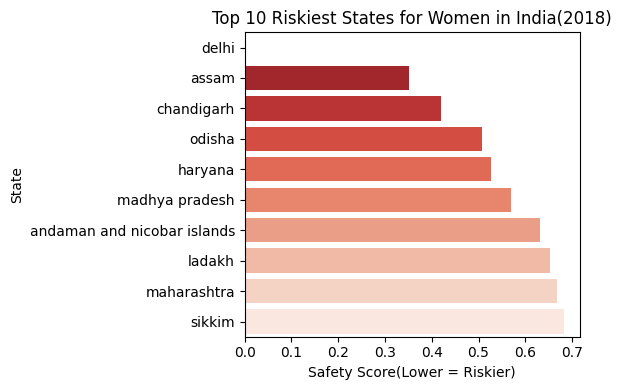

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
top_risky=merged_data.sort_values('Women_Safety_Score',ascending=True).head(10)

sns.barplot(data=top_risky,x='Women_Safety_Score',y='State',hue='State',palette='Reds_r',dodge=False,legend=False)
plt.title("Top 10 Riskiest States for Women in India(2018)")
plt.xlabel("Safety Score(Lower = Riskier)")
plt.ylabel("State")
plt.tight_layout()
plt.show()
          

In [42]:
print(top_risky.shape)

(10, 9)
